# Projeto de Introdução à Inferência Estatística

Esse notebook contém o código em R usado durante o desenvolvimento do projeto da disciplina de Introdução à Inferência Estatística (IIE), ministrada durante o 1º quadrimestre de 2022 na Universidade Federal do ABC (UFABC).

O objetivo geral do projeto era realizar uma análise exploratória sobre uma base de dados, encontrar uma hipótese onde poderiamos aplicar algum conceito estudado ao longo da disciplina de IIE e usar a linguagem R para aceitar ou rejeitar essa hipótese.

Nesse projeto trabalhamos com os dados de emissões de gases do efeito estufa do Sistema de Estimativas de Emissões e Remoções de Gases de Efeito Estufa (SEEG) [[1]](https://basedosdados.org/dataset/br-seeg-emissoes#acesso). Mais explicações sobre cada coluna dos dados usados e um relatório completo sobre eles pode ser encontrado no relatório oficial do SEEG de 2020 [[2]](https://seeg-br.s3.amazonaws.com/Documentos%20Analiticos/SEEG_8/SEEG8_DOC_ANALITICO_SINTESE_1990-2019.pdf).

Primeiro, fizemos uma Análise Exploratória de Dados (EDA). Com os resultados dessa EDA conseguimos identificar algumas informações interessantes dos dados que nos permitiram formular uma hipótese de correlação que depois foi testada usando Correlação de Pearson. Esse notebook contém todo o desenvolvimento dessas duas etapas, a EDA e a aplicação da Correlação de Pearson.

No notebook comentários no código e células markdown contém a explicação passo a passo do que foi realizado nessa etapa do projeto.

Sobre os dados, temos ao todos 454851 linhas e 12 colunas. Seguem os nomes de cada coluna com uma breve descrição:
1. Ano - Entre 1970 e 2019;
2. Setores - Agropecuária, Energia, Mudanças de Uso da Terra, Processos Industriais e Resíduos
3. Processo Emissor - Processo específico de cada setor responsável por emissão;
4. Forma de Emissão - Diretas, Indiretas, Produção de Combustíveis, Agropecuário, Comercial, Geração de Eletricidade (Serviço Público, Industrial, Não Identificado, Público, Residencial);
5. Processo Específico - Outros, Aplicação de resíduos orgânicos, Deposição de dejetos em pastagem, Fertilizantes Sintéticos, Mineralização de Nitrogênio associado a perda de Carbono no solo, Resíduos Agrícolas, Solos orgânicos, Variação dos Estoques de Carbono no Solo, Deposição Atmosférica, Lixiviação;
6. Tipo de Atividade - Vegetal, Animal, Gás, Petróleo, Carvão, Outros;
7. Atividade Específica - Subcategoria do tipo de atividade específica;
8. Tipo de Emissão - Se é emissão ou remoção e forma como é feita;
9. Gás - tipos dos gases - CH4, N2O, CO2, entre outros;
10. Atividade Econômica - Agricultura, Pecuária, Energia Elétrica, entre outros;
11. Produto  - Carne, Energia Elétrica, Aço Alumínio, entre outros;
12. Emissão - Valor numérico numérico da emissão, medido em toneladas.





# Estrutura do Notebook

Como já dito esse notebook contém todas as etapas do nosso projeto que envolveram código. Essas etapas podem ser divididas em três grandes partes:
1. Uma EDA mais geral com o objetivo de nos ajudar a entender melhor os dados que estamos trabalhando a ponto de focar numa parte deles para formularmos nossa hipótese.
2. Uma EDA específica com o que tiver sido concluído na primeira EDA mais geral, ou seja, uma EDA só com a parte dos dados que pensamos em usar para formular nossa hipótese. 
3. O Teste de Hipótese que envolve preparar os dados no formato certo para usar a ferramenta estatística apropriada e a aplicação em si dessa ferramenta estatística.



## 1 - Análise Exploratória de Dados Geral

Essa é a primeira parte do notebook e conta com a Análise Exploratíoria de Dados realizada pelo grupo para chegarmos na hipótese que decidimos trabalhar. Nessa primeira parte também é onde importamos os dados e as bibliotecas necessárias para o desenvolvimento do projeto.

### 1.1 - Importação das bibliotecas necessárias

Importação do *tidyverse*, pacote necessário para realizar visualizações e transformações nos dados do projeto.

In [ ]:
# Instalando o tidyverse
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### 1.2 - Importação dos dados e primeira visualização

Nessa etapa importaremos os dados da base de dados disponibilizada pelo SEEG com *dowload* direto da fonte dos dados, *unzip* do arquivo e importação dos dados do .csv para o R.

Além disso também faremos uma primeira visualização da tabela importada.

In [ ]:
# Baixando dados diretamente disponibilizados pelo SEEG
download.file("https://storage.googleapis.com/basedosdados-public/one-click-download/br_seeg_emissoes/brasil.zip", "/content/dados.zip")

In [ ]:
# Fazendo unzip dos dados que estão compactados
unzip("dados.zip",exdir="/content/dados")

In [ ]:
# Importando os dados do .csv para o R
df <- read.csv(file ='dados/brasil.csv', fileEncoding="UTF-8-BOM", na.strings = '..')

In [ ]:
# Visualizando as primeiras linhas dos dados
head(df)

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,230462.2
2,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,226016.3
3,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,220101.2
4,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,214195.6
5,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,186862.8
6,1975,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,197538.2


### 1.3 - Filtrando os dados no tempo

Uma das decisões de metodologia que foram tomadas pelo grupo foi trabalhar somente com os dados do 5 últimos anos. O SEEG disponibiliza dados desde 1970, mas aqui só trabalharemos com dados entre 2015-2019.

In [ ]:
# Filtrando os dados para os últimos 5 anos
dados <-  filter(df, ano >= 2015)

In [ ]:
# Verificando se o filtro funcionou
head(dados)

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,2015,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,423215.9
2,2016,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,396221.2
3,2017,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,409047.1
4,2018,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,395242.9
5,2019,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),,,400630.9
6,2015,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CO2e (t) GTP-AR2,,,2116079.4


### 1.4 - Renomeando colunas de nível

Na página onde os dados foram disponibilizados a explicação do significado de cada uma das colunas `nivel_1`, `nivel_2`, `nivel_3`, `nivel_4`, `nivel_5` e `nivel_6` é dada. Para facilitar a análise vamos renomear essas colunas.

In [ ]:
# Renomeando colunas de níveis
dados <-  dados %>% rename("setor" = "nivel_1") %>%
          rename("forma_emissao" = "nivel_3") %>% 
          rename("processo_emissor" = "nivel_2") %>% 
          rename("processo_especifico" = "nivel_4") %>%
          rename("tipo_atividade" = "nivel_5") %>%
          rename("atividade_especifica" = "nivel_6")

### 1.5 - Visualização de valores únicos

Nessa etapa vamos apresentar os valores únicos de cada coluna, isso é importante para termos uma referência dos valores possíveis de cada coluna, o que pode auxiliar a aumentar a produtividade durante a EDA.

Uma estratégia que vamos adotar nessa EDA é explorar os dados por coluna, fazendo agrupamentos e plotando gráficos referentes a essa separação, pois acreditamos que isso pode trazer informações interessantes sobre os dados e aumentar nosso conhecimento sobre eles. Nesse processo saber os valores possíveis de cada coluna também é relevante.

In [ ]:
# Valores únicos de cada coluna
for (i in 1:11){
  print(unique(dados[i]))
}

   ano
1 2015
2 2016
3 2017
4 2018
5 2019
                                   setor
1                           Agropecuária
3271                             Energia
30121 Mudança de Uso da Terra e Floresta
43026              Processos Industriais
44901                          Resíduos 
                                           processo_emissor
1                                          Cultivo do Arroz
36                                     Fermentação Entérica
351                               Manejo de Dejetos Animais
721                            Queima de Resíduos Agrícolas
821                                         Solos Manejados
3271                                     Emissões Fugitivas
3446                   Emissões pela Queima de Combustíveis
30121                             Alterações de Uso do Solo
37646                           Remoção em Áreas Protegidas
38276                   Remoção por Mudança de Uso da Terra
40726                      Remoção por Vegetação Sec

### 1.6 - Evolução de emissões ao longo dos anos

Plot de uma tabela e de um gráfico que apresentam a evolução da emissão total de gases ao longo dos anos. Os valores estão em toneladas de gás emitido.

In [ ]:
# Plotando emissão de gases por Ano
emissao_ano <-  dados %>%
                group_by(ano) %>%
                summarise(emissao_total = sum(emissao))
emissao_ano

ano,emissao_total
<int>,<dbl>
2015,9784229877
2016,10467692560
2017,9695399849
2018,9002459963
2019,12555858925


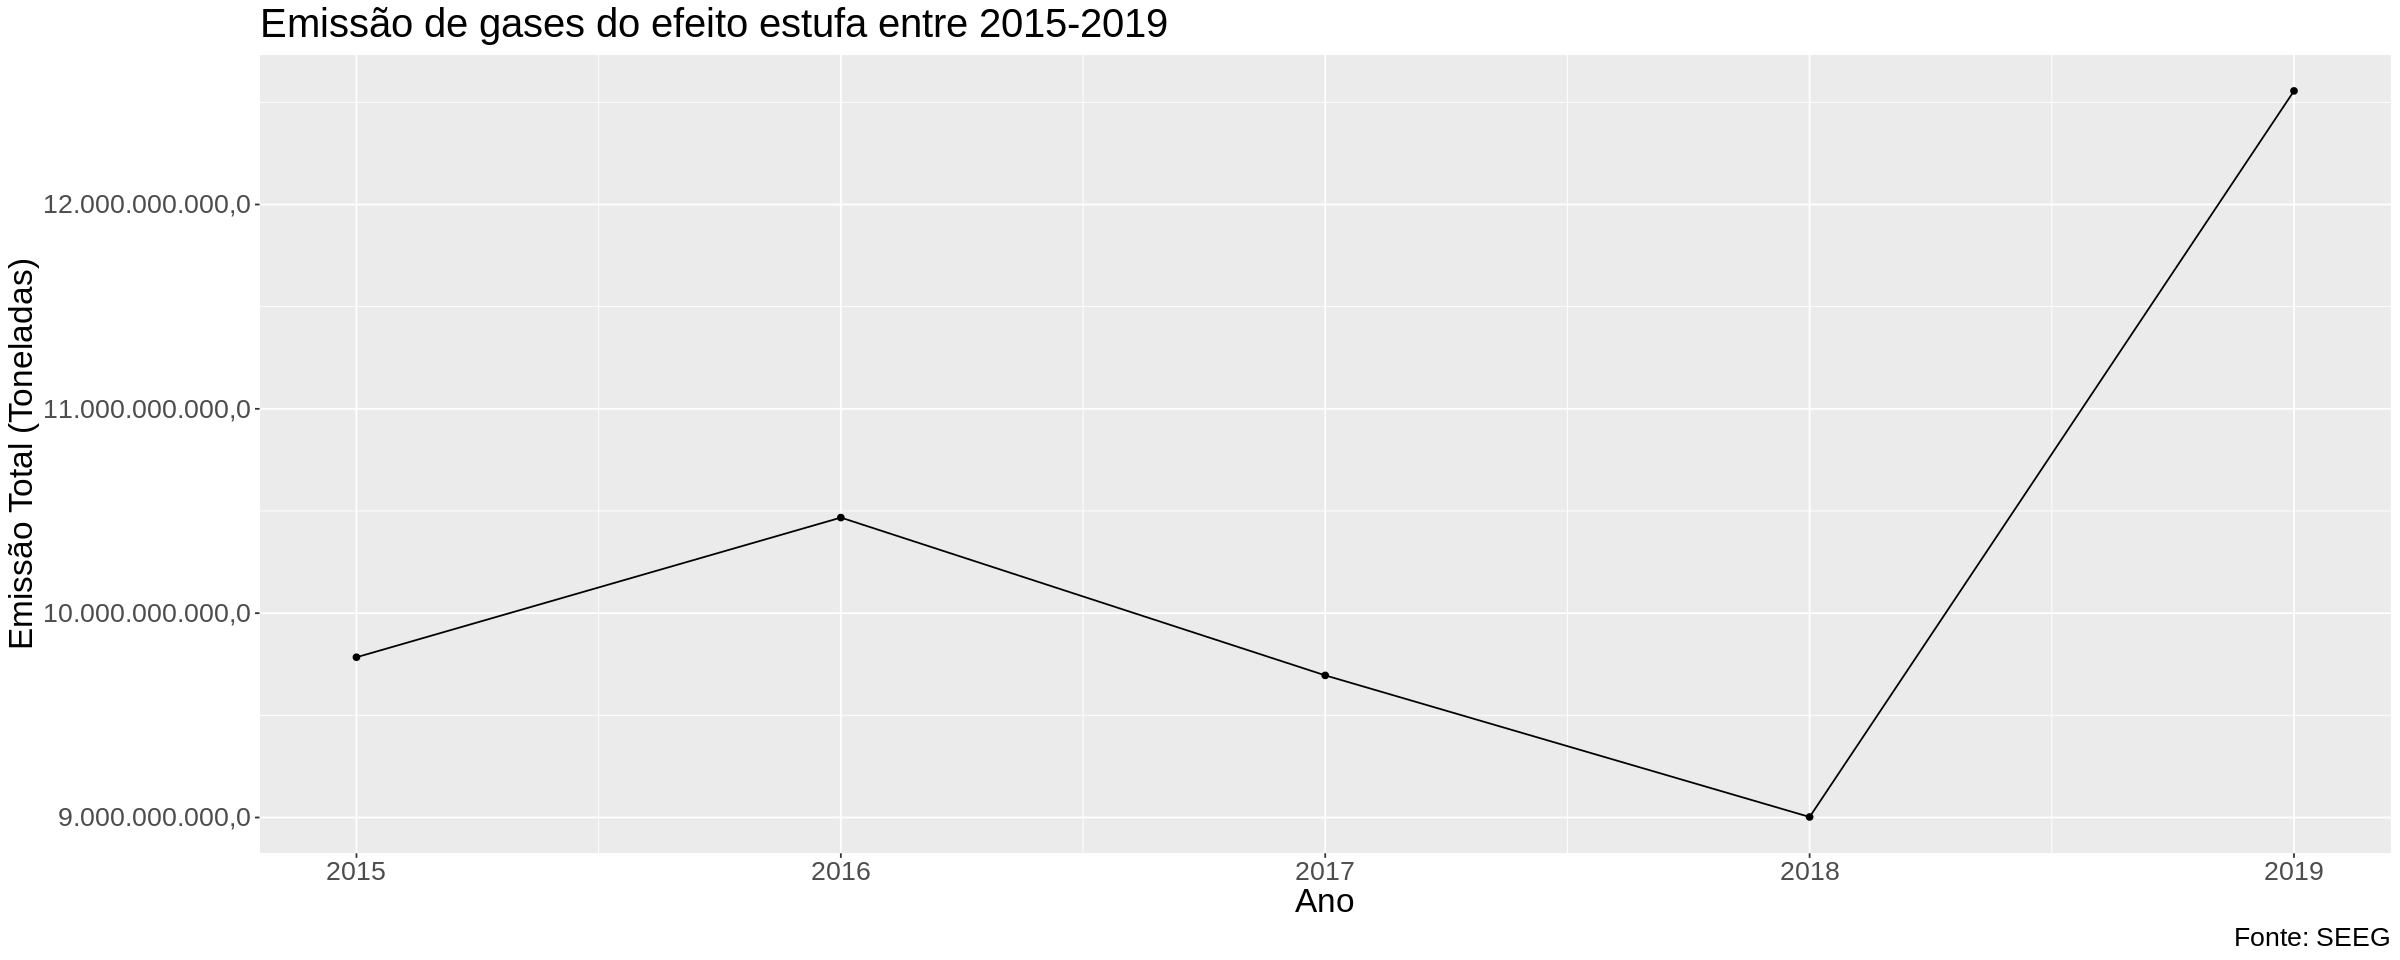

In [ ]:
# Plotando gráfico de evolução de emissões
options(repr.plot.width=20, repr.plot.height=8)
ggplot(emissao_ano, aes(x=ano, y=emissao_total)) +
geom_line()+
geom_point() +
labs(y = "Emissão Total (Toneladas)", x = "Ano",
    title = "Emissão de gases do efeito estufa entre 2015-2019", 
    caption = "Fonte: SEEG"
    )+
scale_y_continuous(labels = scales::number_format(accuracy = 0.1,
                                                  decimal.mark = ",",
                                                  big.mark = "."))+
theme(text = element_text(size = 20))

### 1.7 - Emissão por setor

Plotando gráfico que mostra a emissão de gases por setor emissor.

In [ ]:
# Agrupando valores por setor e mostrando emissão total
dados %>%
group_by(setor) %>%
summarise(emissao_total = sum(emissao))

setor,emissao_total
<chr>,<dbl>
Agropecuária,11031803912
Energia,15226019153
Mudança de Uso da Terra e Floresta,20507473462
Processos Industriais,3211939041
Resíduos,1528405607


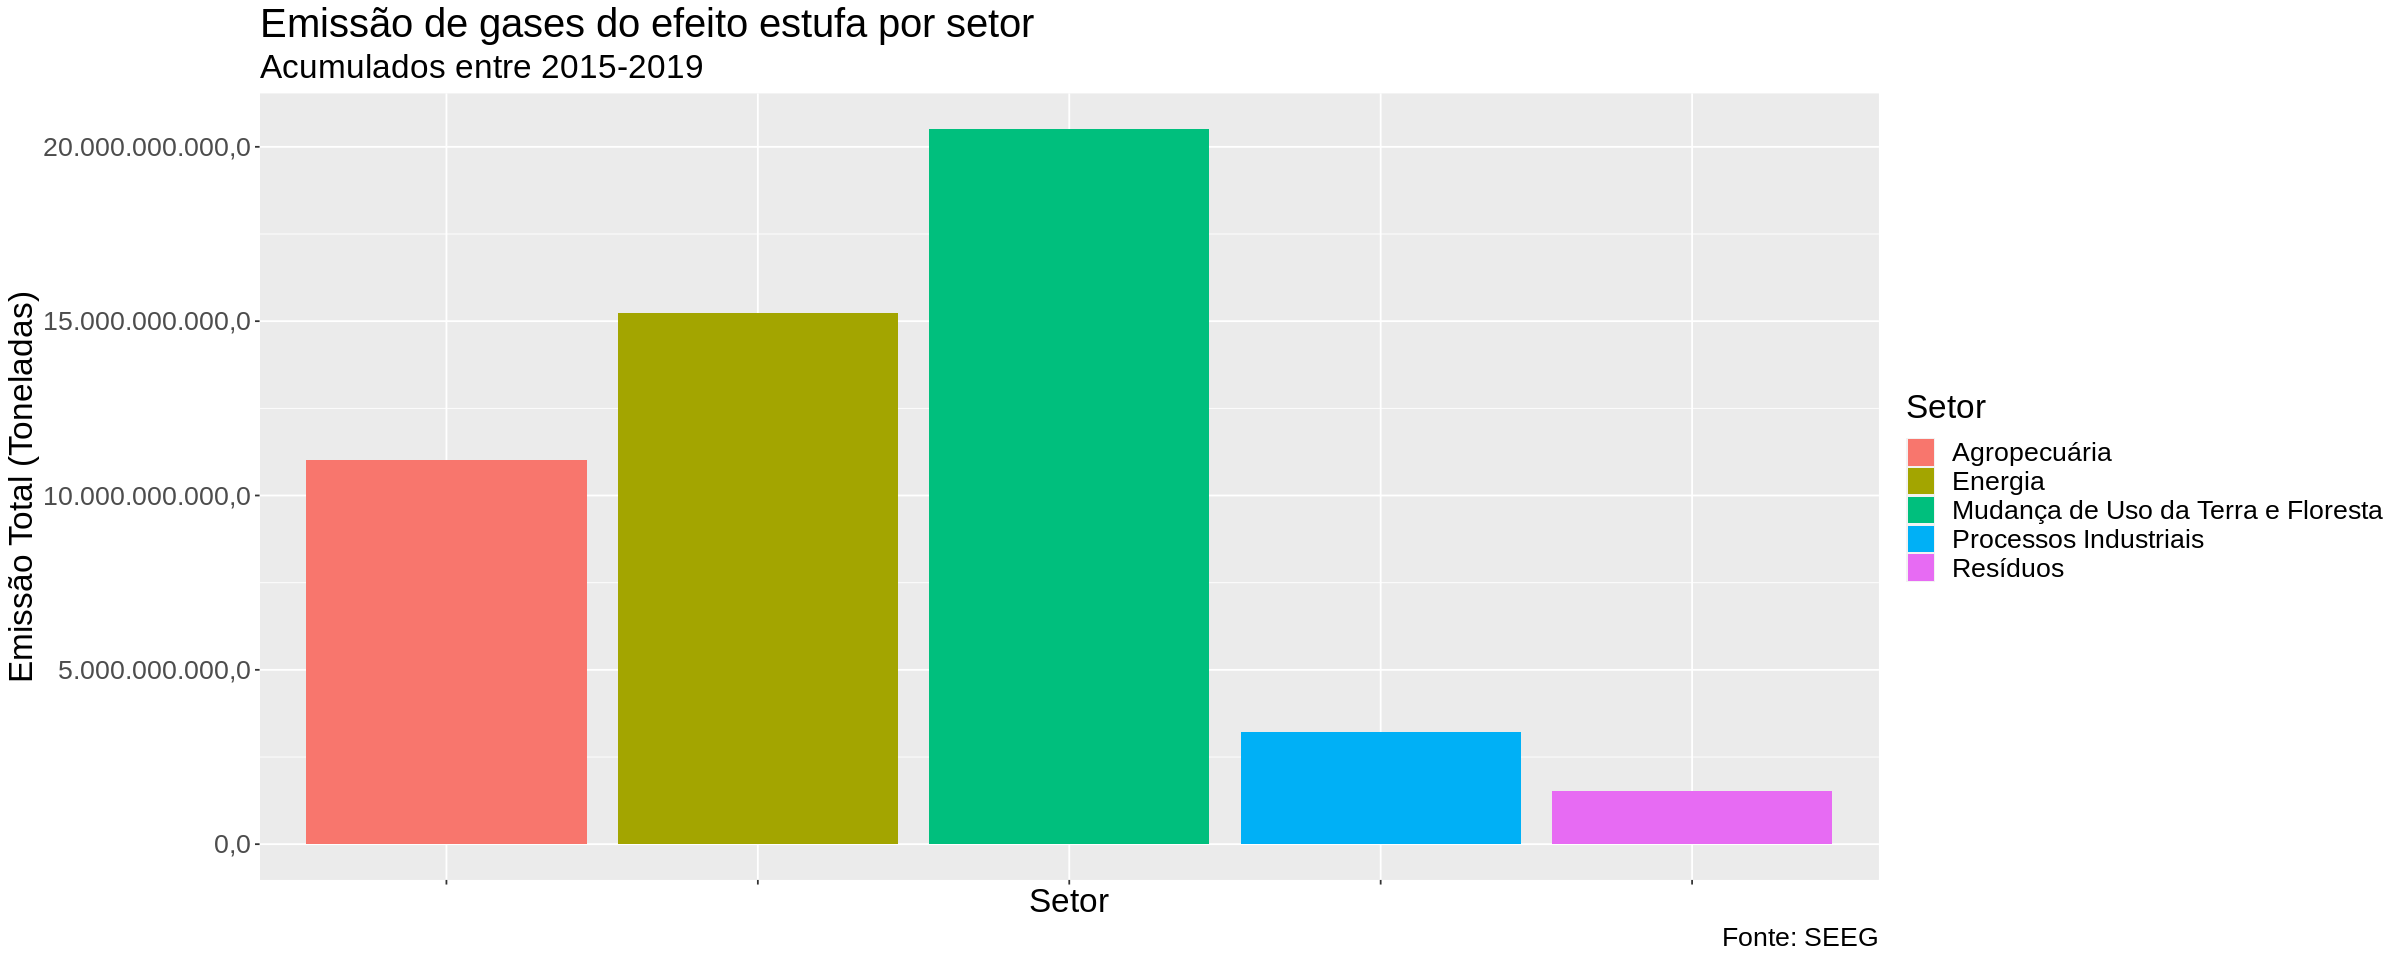

In [ ]:
# Plotando gráfico com emissões por setor
options(repr.plot.width=20, repr.plot.height=8)
ggplot(data = dados) +
geom_bar(aes(x = setor, weight = emissao, fill = setor), show.legend = T) +
labs(y = "Emissão Total (Toneladas)", x = "Setor",
    title = "Emissão de gases do efeito estufa por setor", 
    subtitle = "Acumulados entre 2015-2019",
    caption = "Fonte: SEEG",
    fill = "Setor"
    )+
scale_y_continuous(labels = scales::number_format(accuracy = 0.1,
                                                  decimal.mark = ",",
                                                  big.mark = "."))+
theme(axis.text.x = element_blank())+
theme(text = element_text(size = 20))                       

### 1.8 - Emissão por processo emissor

Plot de gráfico e tabela mostrando emissão por processo emissor de gases.

In [ ]:
# Mostrando emissão por processo emissor através de tabela
dados %>%
group_by(processo_emissor) %>%
summarise(emissao_total = sum(emissao))

processo_emissor,emissao_total
<chr>,<dbl>
Alterações de Uso do Solo,57734625393
Cultivo do Arroz,180167855
Efluentes Liquidos,529966372
Emissões de HFCs,322962845
Emissões Fugitivas,723306548
Emissões pela Queima de Combustíveis,14502712605
Fermentação Entérica,5851090303
Indústria Química,123899003
Manejo de Dejetos Animais,396657766


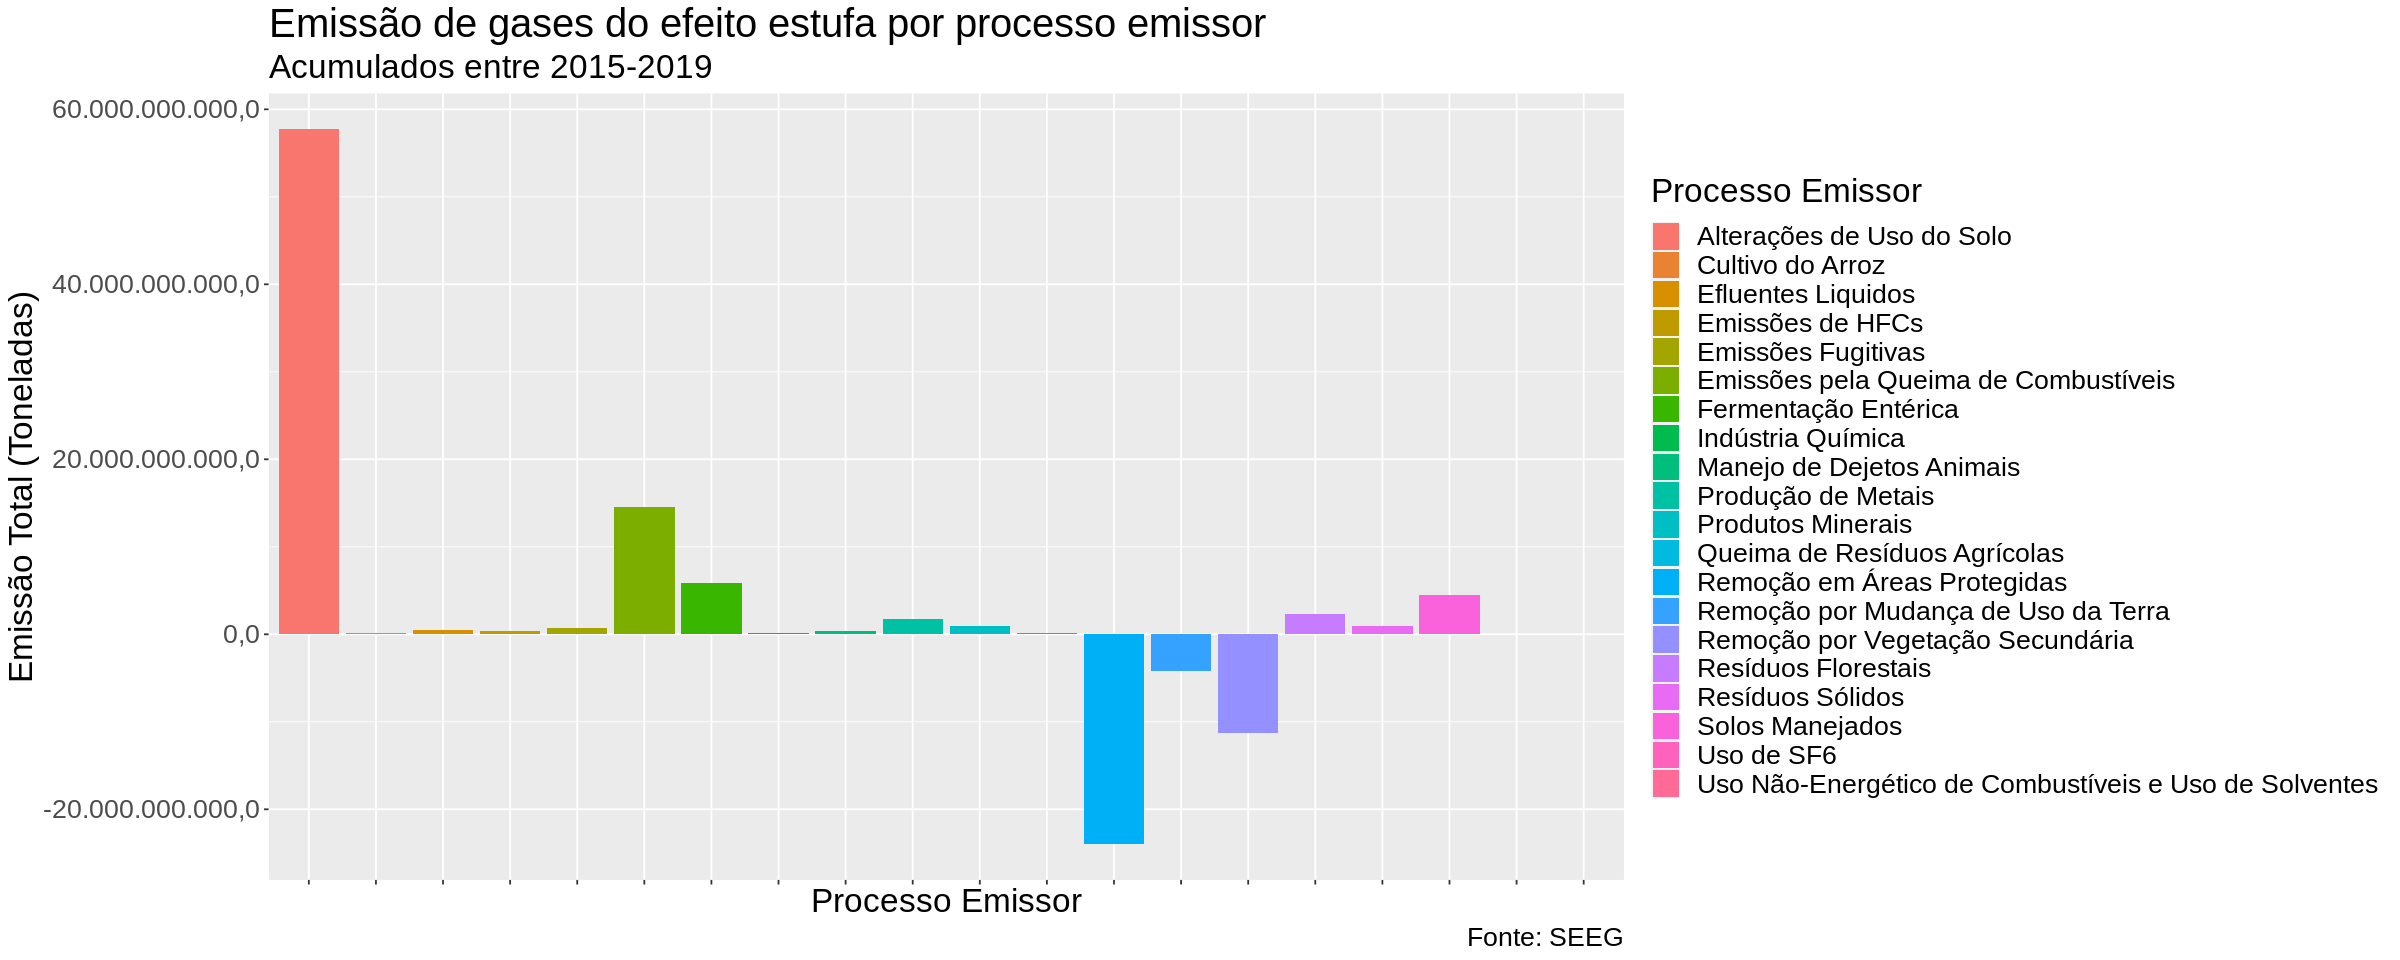

In [ ]:
# Mostrando emissão de processos emissores através de um gráfico
options(repr.plot.width=20, repr.plot.height=8)
ggplot(data = dados) +
geom_bar(aes(x = processo_emissor, weight = emissao, fill = processo_emissor), show.legend = T) +
labs(y = "Emissão Total (Toneladas)", x = "Processo Emissor",
    title = "Emissão de gases do efeito estufa por processo emissor", 
    subtitle = "Acumulados entre 2015-2019",
    caption = "Fonte: SEEG",
    fill = "Processo Emissor"
    )+
scale_y_continuous(labels = scales::number_format(accuracy = 0.1,
                                                  decimal.mark = ",",
                                                  big.mark = ".")) + 
theme(axis.text.x=element_blank())+
theme(text = element_text(size = 20))         

Veja que na tabela existem alguns processos que apresentam valores de emissão negativos, esses ficam ainda mais evidentes no gráfico. Esses processos com valores negativos são conhecidos como **processos de remoção** de gases. 

A apresentação desses dados de remoção pode ser um pouco contraintuitiva numa coluna que indica emissão, mas tratam-se de processos interessantes e que destacam-se em relação aos demais justamente por tratarem de uma atividade específica que vai contra praticamente todos os outros dados coletados.

### 1.9 - Emissão por tipo de emissão

Mostrando a emissão de gases por tipo de emissão.

In [ ]:
# Tabela com emissão por tipo de emissão
dados %>%
group_by(tipo_emissao) %>%
summarise(emissao_total = sum(emissao))

tipo_emissao,emissao_total
<chr>,<dbl>
Bunker,633810376
Emissão,59877293042
Emissão NCI,3872215662
Emissão proxy,31611652597
Remoção,-20680120846
Remoção NCI,-4969379338
Remoção proxy,-18839830318


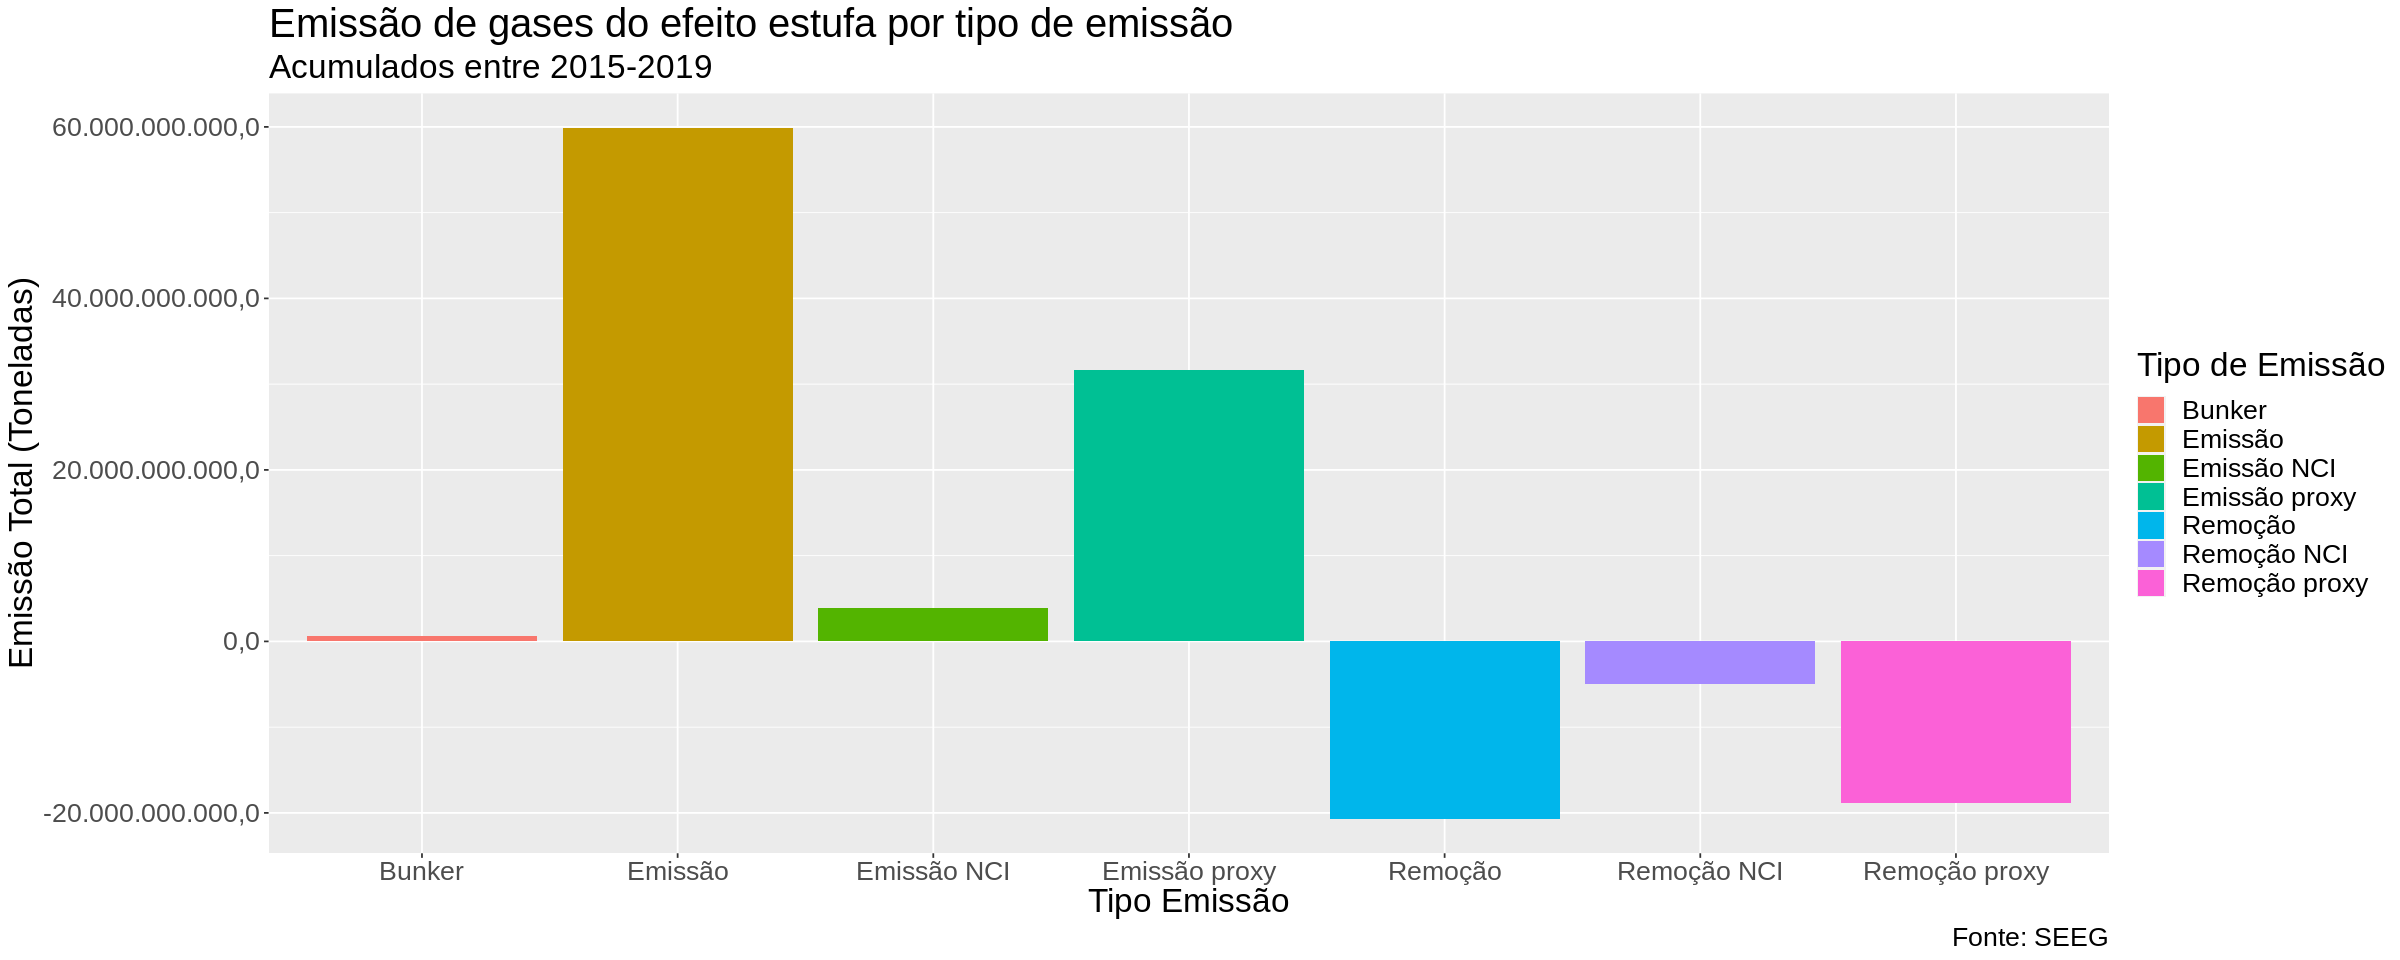

In [ ]:
# Plot de gráfico com emissões por tipo de emissão
options(repr.plot.width=20, repr.plot.height=8)
ggplot(data = dados) +
geom_bar(aes(x = tipo_emissao, weight = emissao, fill = tipo_emissao), show.legend = T) +
labs(y = "Emissão Total (Toneladas)", x = "Tipo Emissão",
    title = "Emissão de gases do efeito estufa por tipo de emissão", 
    subtitle = "Acumulados entre 2015-2019",
    caption = "Fonte: SEEG",
    fill = "Tipo de Emissão"
    )+
scale_y_continuous(labels = scales::number_format(accuracy = 0.1,
                                                  decimal.mark = ",",
                                                  big.mark = "."))+
theme(text = element_text(size = 20))  

Mais uma vez os processos de remoção estão bem evidenciados em uma coluna dos dados. Não somente isso, mas também com menos categorias é possível ver como eles possuem valores bem significativos em relação às emissões.



## 2 - Explorando os Dados de Remoção de Gases

Após uma primeira EDA mais aberta percebemos não só a existência mas também a significância dos processos de remoção de gases. Por causa disso, decidimos continuar nossa exploração de maneira mais focada nesse dados, para assim sermos capazes de formular hipótese sobre eles.

### 2.1 - Filtrando dados de remoção

Vamos criar um novo dataset que só contenha linhas referentes a processos de remoção. Essas linhas podem ser identificadas quando o valor de emissão é negativo (menor que 0). Depois vamos visualizar a tabela gerada por esses dados.

In [ ]:
# Filtrando os dados para só termos dados com emissão negativa
dados_remocao <- filter(dados, emissao < 0)

In [ ]:
# Visualizando somente os dados onde temos remoção
head(dados_remocao)

,ano,setor,processo_emissor,forma_emissao,processo_especifico,tipo_atividade,atividade_especifica,tipo_emissao,gas,atividade_economica,produto,emissao
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,2015,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Florestas Plantadas,Remoção NCI,CO2 (t),,,-6031512
2,2016,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Florestas Plantadas,Remoção NCI,CO2 (t),,,-6309484
3,2017,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Florestas Plantadas,Remoção NCI,CO2 (t),,,-6447024
4,2018,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Florestas Plantadas,Remoção NCI,CO2 (t),,,-6408685
5,2019,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Florestas Plantadas,Remoção NCI,CO2 (t),,,-6599602
6,2015,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Florestas Plantadas,Remoção NCI,CO2e (t) GTP-AR2,,,-6031512


In [ ]:
# Verificando quantidade de linhas referentes a remoção
nrow(dados_remocao)

[1] 4662

Ao todo temos 4662 linhas de dados referentes a processos de remoção.

### 2.2 - Valores de remoção ao longo dos anos

Como os valores de remoção evoluiram ao longo do tempo.

In [ ]:
# Vamos ver como as remoções se comportaram ao longo dos anos
dados_remocao %>%
group_by(ano) %>%
summarise(emissao_total = sum(emissao))

ano,emissao_total
<int>,<dbl>
2015,-8664103257
2016,-8818246692
2017,-8918178323
2018,-9008428461
2019,-9080373769


### 2.3 - Agrupando remoção por setores

Visualizando setores que mais contribuiram com remoções.

In [ ]:
# Quais foram os setores que mais contibuiram para remoção?
dados_remocao %>%
group_by(setor) %>%
summarise(emissao_total = sum(emissao))

setor,emissao_total
<chr>,<dbl>
Agropecuária,-4969379338
Mudança de Uso da Terra e Floresta,-39519951164


Veja que só temos dois setores que contribuiram para as remoções

### 2.4 - Agrupando remoção por forma de emissão

Visualizando quais as formas de emissão, no caso formas de remoção, com maior contribuição.

In [ ]:
# Vendo agora por forma_emissao
dados_remocao %>%
group_by(forma_emissao) %>%
summarise(emissao_total = sum(emissao))

forma_emissao,emissao_total
<chr>,<dbl>
Amazônia,-27486638718
Caatinga,-1591116922
Cerrado,-4285050522
Diretas,-4969379338
Mata Atlântica,-5499653026
Pampa,-494065509
Pantanal,-163426467


Veja que interessante, dentro das formas de remoção a grande maioria dos dados é categorizado por bioma onde a ação de remoção ocorreu. 

Isso nos leva a questionar quais outros dados podem ser agrupados por bioma?

### 2.5 - Explorando dados que podem ser agrupados por bioma

Vamos tentar encontrar outros tipos de atividade que também possuem biomas como forma de emissão.

In [ ]:
# Verificando quais outras atividades também podem ser categorizadas por biomas
dados_biomas <- dados %>% filter(forma_emissao == "Amazônia" | 
                                 forma_emissao == "Caatinga" |
                                 forma_emissao == "Cerrado" |
                                 forma_emissao == "Mata Atlântica" |
                                 forma_emissao == "Pampa" |
                                 forma_emissao == "Pantanal"
                                 ) 
dados_biomas %>%
group_by(tipo_atividade) %>%
summarise(emissao_total = sum(emissao))

tipo_atividade,emissao_total
<chr>,<dbl>
Desmatamento,57634042284
NÃO SE APLICA,-14393673304
Outras Mudanças de uso da terra,621243504
Regeneração,-2924417968
Vegetação nativa estável,-20429721053


Veja que além de processos de remoção, outros processos que podem ser agrupados por bioma onde ocorreram são o `Desmatamento` e `Outras Mudanças de uso da terra`. 

Vamos focar nossas atenções nos dados referentes ao `Desmatamento`.

### 2.6 - Visualizando dados de desmatamento por bioma

Vamos filtrar os dados para só obtermos emissões referentes ao desmatamento e agrupar esses dados por bioma.

In [ ]:
# Verificando a quantidade de emissão por desmatamento em cada bioma
dados_desmatamento <- dados %>% filter(tipo_atividade == "Desmatamento")
dados_desmatamento %>%
group_by(forma_emissao) %>%
summarise(emissao_total = sum(emissao))

forma_emissao,emissao_total
<chr>,<dbl>
Amazônia,40907022435
Caatinga,1523076313
Cerrado,8030349529
Mata Atlântica,2030827241
Pampa,4152226883
Pantanal,990539882


## Conclusões pós Análise Exploratória e Hipótese

Ao longo de nossa EDA conseguimos identificar que as remoções de gases do efeito estufa também são contabilizadas nos dados, nos interessamos nelas e decidimos investigá-las de maneira mais focada.

Ao começarmos a fazer tentativas de agrupamento das remoções percebemos que elas podem ser agrupadas por bioma onde as remoções ocorreram. Essa é mais uma informação que puxou nosso interesse.

Então, decidimos ver que outros conjuntos de dados poderiam ser agrupados por bioma. Após alguma exploração descobrimos que as emissões por desmatamento também são dados que podem ser agrupados por biomas.

Dessa forma temos dois dados que são agrupados por biomas, remoção de gases e desmatamento. Com essas informações chegamos à hipótese que trabalharemos nesse projeto: 
**A remoção de gases do efeito estufa para um determinado bioma em um determinado ano é correlacionada linearmente com as emissões por desmatamento daquele bioma naquele ano.**

## 3 - Teste de Hipótese

Após explorarmos os dados e chegarmos à hipótese que decidimos testar temos que viabilizar a aplicação do teste de correlação nos nossos dados. Para fazer isso é necessário que algumas alterações sejam feitas na estruturas das tabelas que aplicaremos os testes.

### 3.1 - Entendendo estrutura que será usada

Para aplicar o teste de correlação temos que construir uma tabela com o seguinte formato:

**Ano | Bioma | Emissão por Desmatamento | Remoção**

Nesse formato de tabela cada par **Ano | Bioma** caracteriza uma amostra que possui duas variáveis numéricas, a **Emissão por Desmatamento** e a **Remoção**. Dessa forma podemos aplicar o teste de correlação sobre essas duas variáveis.

### 3.2 - Coletando dados de desmatamento

Para construir nossa nova tabela vamos primeiro coletar os dados referentes a desmatamento.

In [ ]:
# Construindo tabela com dados de desmatamento
dados_desmatamento <- dados %>% filter(tipo_atividade == "Desmatamento")
desmatamento_final <- dados_desmatamento[c("ano", 
                                           "forma_emissao", 
                                           "emissao")] %>%
group_by(ano, forma_emissao)  %>%
summarise(emissao_total = sum(emissao))

`summarise()` has grouped output by 'ano'. You can override using the `.groups`
argument.


In [ ]:
# Aproveitando e já renomeando as colunas da nova tabela
desmatamento_final <-  desmatamento_final %>% rename("bioma" = "forma_emissao") %>%
                                              rename("emissao_desmatamento" = "emissao_total") 
desmatamento_final

ano,bioma,emissao_desmatamento
<int>,<chr>,<dbl>
2015,Amazônia,6786869675
2015,Caatinga,373012139
2015,Cerrado,2178222226
2015,Mata Atlântica,386646377
2015,Pampa,712359025
2015,Pantanal,164115132
2016,Amazônia,8383845324
2016,Caatinga,255112766
2016,Cerrado,1541305693


### 3.3 - Coletando dados de remoção

Vamos fazer o mesmo que fizemos com os dados de emissão por desmatamento, só que agora com os dados de remoção.

In [ ]:
# Construindo tabela com dados de remoção em biomas
remocao_final <- dados %>% 
filter(emissao < 0) %>% 
filter(forma_emissao == "Amazônia" | 
       forma_emissao == "Caatinga" |
       forma_emissao == "Cerrado" |
       forma_emissao == "Mata Atlântica" |
       forma_emissao == "Pampa" |
       forma_emissao == "Pantanal"
       )
remocao_final <- remocao_final[c("ano", 
                                 "forma_emissao", 
                                 "emissao")] %>%
group_by(ano, forma_emissao) %>%
summarise(emissao_total = sum(emissao))

`summarise()` has grouped output by 'ano'. You can override using the `.groups`
argument.


In [ ]:
# Renomeando colunas da tabela de remoção
remocao_final <-  remocao_final %>% rename("bioma" = "forma_emissao") %>%
                                    rename("remocao" = "emissao_total") 
remocao_final

ano,bioma,remocao
<int>,<chr>,<dbl>
2015,Amazônia,-5402165272
2015,Caatinga,-314297523
2015,Cerrado,-849505850
2015,Mata Atlântica,-1069379549
2015,Pampa,-98398800
2015,Pantanal,-32297624
2016,Amazônia,-5476173556
2016,Caatinga,-312956351
2016,Cerrado,-854068302


### 3.4 - Cruzando as duas tabelas

Agora que temos os dados tanto de remoção quanto de emissão por desmatamento agrupados por bioma e ano vamos cruzar as duas tabelas para que assim tenhamos uma única tabela com as duas variáveis.

In [ ]:
# Criando tabela que usaremos no teste de correlação usando inner join sobre ano e bioma
tabela_final <- inner_join(desmatamento_final, remocao_final, 
                by = c("ano" = "ano", "bioma" = "bioma"))
tabela_final

ano,bioma,emissao_desmatamento,remocao
<int>,<chr>,<dbl>,<dbl>
2015,Amazônia,6786869675,-5402165272
2015,Caatinga,373012139,-314297523
2015,Cerrado,2178222226,-849505850
2015,Mata Atlântica,386646377,-1069379549
2015,Pampa,712359025,-98398800
2015,Pantanal,164115132,-32297624
2016,Amazônia,8383845324,-5476173556
2016,Caatinga,255112766,-312956351
2016,Cerrado,1541305693,-854068302


### 3.5 - Plotando dados

Vamos visualizar os dados usando um gráfico de dispersão, isso pode nos ajudar a entender melhor o comportamento das variáveis, indicando visualmene se há evidências de correlação entre as duas variáveis ou não. Vamos aproveitar e visualizar como os pontos de cada bioma se comportam.

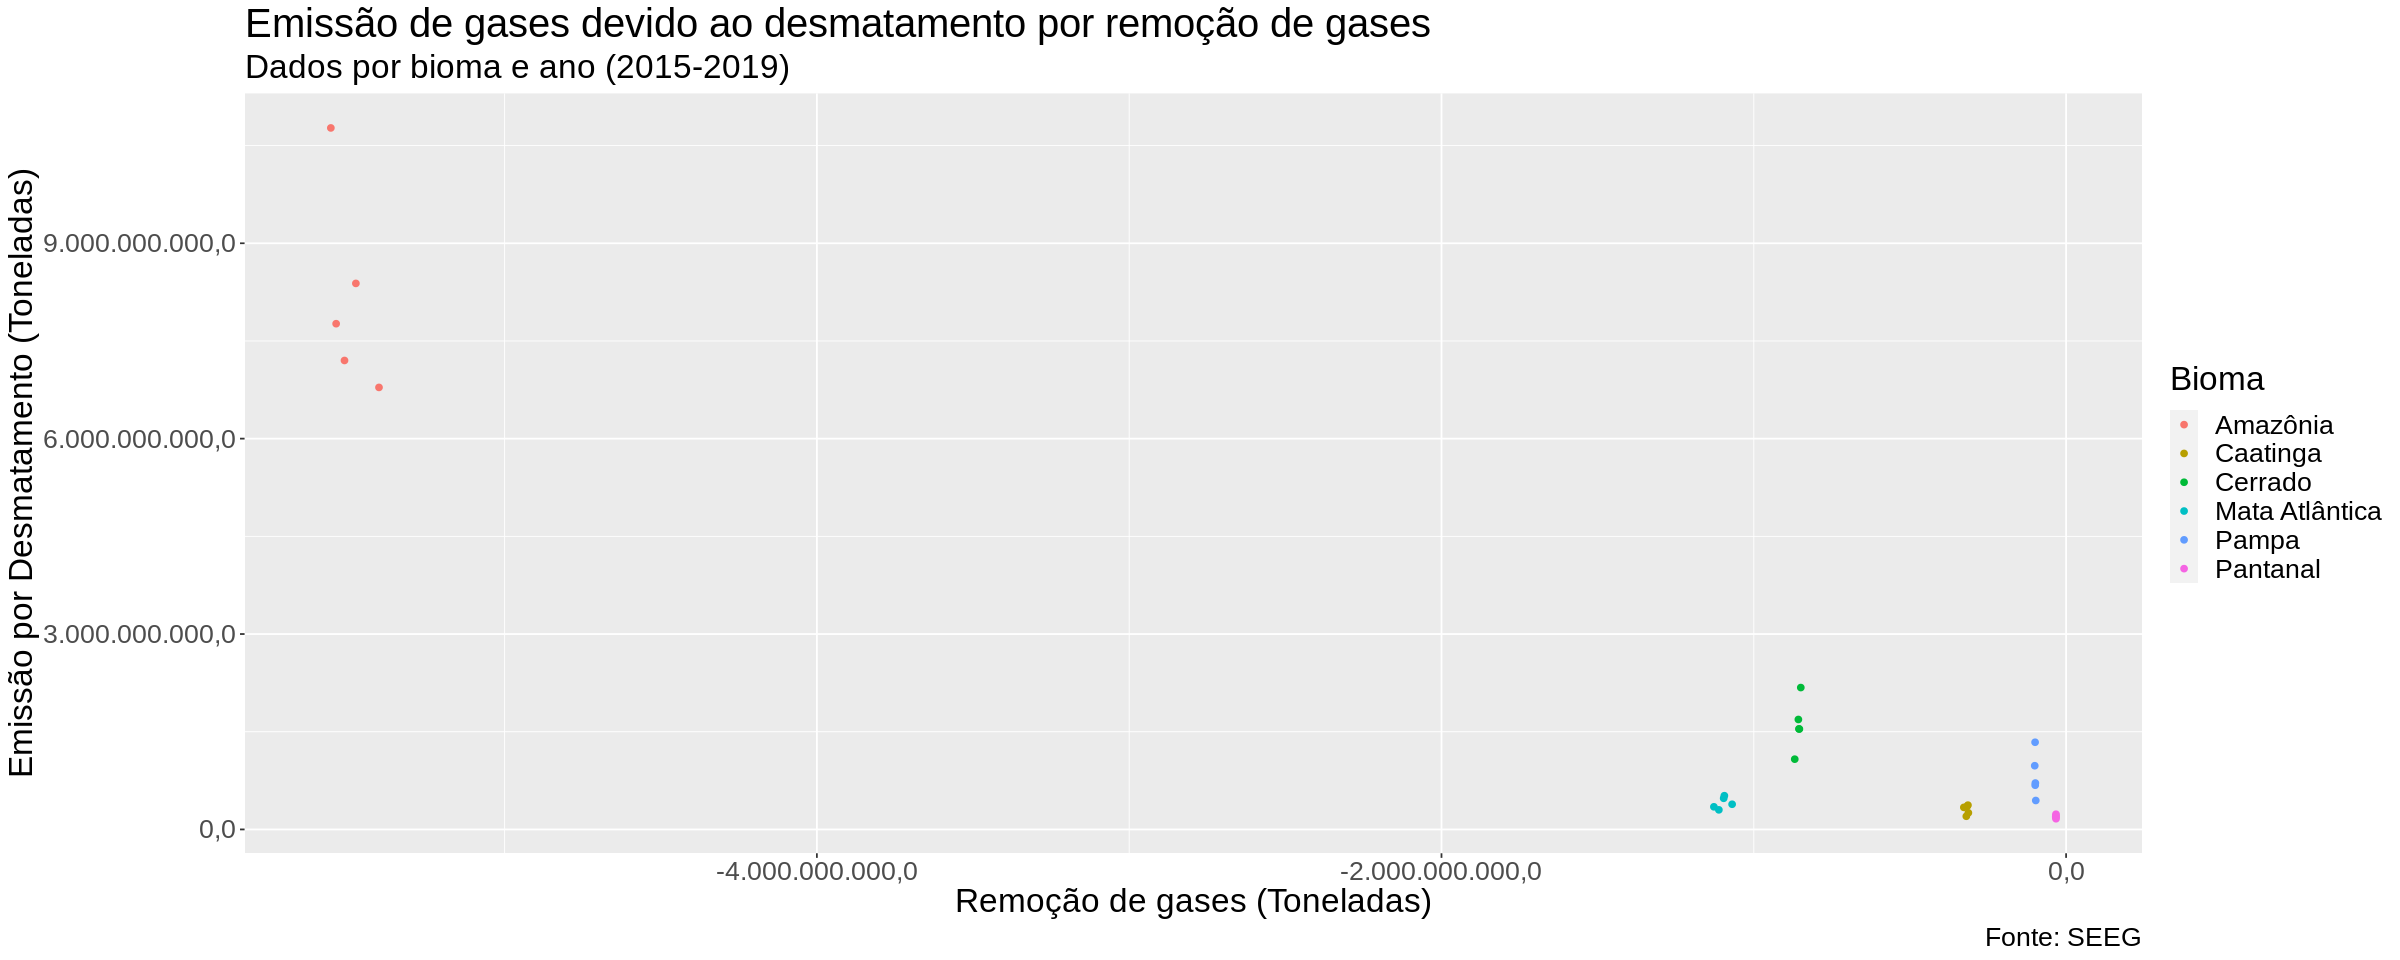

In [ ]:
# Plot dos dados
ggplot(data = tabela_final) +
geom_point(aes(x = remocao, y = emissao_desmatamento, color = bioma)) +
labs(y = "Emissão por Desmatamento (Toneladas)", x = "Remoção de gases (Toneladas)",
    title = "Emissão de gases devido ao desmatamento por remoção de gases", 
    subtitle = "Dados por bioma e ano (2015-2019)",
    caption = "Fonte: SEEG",
    color = "Bioma"
    ) +
scale_y_continuous(labels = scales::number_format(accuracy = 0.1,
                                              decimal.mark = ",",
                                              big.mark = ".")) +
scale_x_continuous(labels = scales::number_format(accuracy = 0.1,
                                              decimal.mark = ",",
                                              big.mark = "."))+
theme(text = element_text(size = 20))

### 3.6 - Aplicação do teste de correlação

Agora com nossos dados preparados podemos aplicar o Teste de Correlação de Person sobre os dados de remoção e de emissão por desmatamento. Para aplicar o teste usaremos uma função própria da linguagem R a `corr.test()`.

In [ ]:
# Aplicando teste de correlação
cor.test(tabela_final$emissao_desmatamento, tabela_final$remocao)


	Pearson's product-moment correlation

data:  tabela_final$emissao_desmatamento and tabela_final$remocao
t = -17.645, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9799553 -0.9124629
sample estimates:
       cor 
-0.9578544 


### 3.7 - Avaliando os resultados

Podemos ver pelo resultado da etapa 3.5 que o índice de correlação de Pearson para o nosso problema foi de -0.9578. 

A teoria nos indica que quanto mais próximo de -1 o índice de correlação, mais próxima a correlação testada está de uma correlação negativa linear perfeita, ou seja, temos um indicativo muito forte de que a correlação entre a emissão por desmatamento e a remoção de gases de efeito estufa é altamente relacionada e negativamente.

O significado do Intervalo de Confiança (IC) dado é de que com confiança de 95% a verdadeira correlação, nossa estatística, está entre -0.9799553 e -0.9124629, o que reforça bastante que existe uma correlação entre as variáveis e de que ela é muito negativa.

Saindo da correlação em si e indo para o teste de hipótese relacionado. O valor de destaque indicado é o p-valor. Veja que o p-valor dado foi de 2,2 * 10<sup>-16</sup>, um valor muito baixo. Lembrando que no contexto de teste de correlação o p-valor indica qual a probabilidade de termos encontrado o coeficiente de correlação com tal valor (-0.9578) se na verdade o coeficiente de correlação fosse zero, ou seja, se na verdade não houvesse correlação entre as variáveis testadas.

Assim, considerando um valor $α$ = 0,05 (5%), como p-valor é menor que $α$ podemos rejeitar a hipótese nula e aceitar a hipótese alternativa, que como mostrado na etapa acima é de que a correlação verdadeira entre essas duas variáveis não é igual a 0.

Concluindo, temos fortes evidências de que a correlação existe através do teste de hipótese com rejeição da hipótese nula. Além disso, com os valores do coeficiente de correlação e do IC também temos fortes indicações das características dessa correlação como forte e negativa.

Lembrando sempre que por mais que nossos resultados tenham sido muito positivos para correlação não significa que eles sejam significativos para causalidade.
